In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

df = pd.read_csv('data/nycflights.csv', index_col='index')
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
index,,,,,,,,,,,,,,,,
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [12]:
df.isnull().values.any()

True

In [13]:
df.isnull().sum().sum()

63105

In [14]:
np.sum(df.isna())

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
hour         8255
minute       8255
dtype: int64

In [15]:
df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,336776.000000,327346.000000,336776.000000,328521.000000,328521.000000
mean,2013.0,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,1971.923620,150.686460,1039.912604,13.173544,31.755501
std,0.0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,1632.471938,93.688305,733.233033,4.894426,18.230997
min,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,16.000000
50%,2013.0,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,1496.000000,129.000000,872.000000,14.000000,31.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,49.000000
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,8500.000000,695.000000,4983.000000,24.000000,59.000000


In [16]:
df = df.dropna()
df = df.reset_index(drop=True)
np.sum(df.isna())

year         0
month        0
day          0
dep_time     0
dep_delay    0
arr_time     0
arr_delay    0
carrier      0
tailnum      0
flight       0
origin       0
dest         0
air_time     0
distance     0
hour         0
minute       0
dtype: int64

In [17]:
len(df)

327346

## Bài 1:
● Đếm số chuyến bay trễ của các sân bay (cột ‘origin’)

● Tương tự, đếm số chuyến bay không trễ của các sân bay

● Tạo bảng hiển thị số chuyến bay trễ vs. không trễ

● Vẽ lên biểu đồ


In [18]:
df.groupby('origin')['dep_delay'].apply(lambda x: (x>0).sum()).reset_index(name='dep_delay_count')

,origin,dep_delay_count
0,EWR,52414
1,JFK,41833
2,LGA,33498


In [19]:
df.groupby('origin')['arr_delay'].apply(lambda x: (x<0).sum()).reset_index(name='arr_delay_count')

,origin,arr_delay_count
0,EWR,65112
1,JFK,64390
2,LGA,59431


In [20]:
df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,327346.0,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,2013.0,6.564803,15.740825,1348.789883,12.555156,1501.908238,6.895377,1943.104501,150.686460,1048.371314,13.170361,31.753780
std,0.0,3.413444,8.777376,488.319979,40.065688,532.888731,44.633292,1621.523684,93.688305,735.908523,4.894819,18.230677
min,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,1.000000,20.000000,80.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,544.000000,82.000000,509.000000,9.000000,16.000000
50%,2013.0,7.000000,16.000000,1400.000000,-2.000000,1535.000000,-5.000000,1467.000000,129.000000,888.000000,14.000000,31.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,3412.000000,192.000000,1389.000000,17.000000,49.000000
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,8500.000000,695.000000,4983.000000,24.000000,59.000000


In [21]:
# Những chuyến bay có khởi hành hoặc đến nơi trễ 
temp = df[(df['dep_delay'] > 0) | (df['arr_delay'] > 0)]
delay_ = temp.groupby('origin')['origin'].count().reset_index(name='delay')
delay_

,origin,delay
0,EWR,64841
1,JFK,55395
2,LGA,48210


In [22]:
# Những chuyến bay khởi hành và đến nơi đúng giờ
temp = df[(df['dep_delay'] <= 0) & (df['arr_delay'] <= 0)]
intime_ = temp.groupby('origin')['origin'].count().reset_index(name='intime')
intime_

,origin,intime
0,EWR,52286
1,JFK,53684
2,LGA,52930


In [23]:
(np.sum(delay_['delay']) + np.sum(intime_['intime'])) == len(df)

True

In [24]:
len(df) 

327346

In [25]:
# Đếm số chuyến bay trễ của các sân bay (cột ‘origin’)
temp = df[['origin','dep_delay','arr_delay']][(df['dep_delay'] > 0) | (df['arr_delay'] > 0)]
delay_origin = temp.groupby('origin')['origin'].count().reset_index(name='delay')
delay_origin

,origin,delay
0,EWR,64841
1,JFK,55395
2,LGA,48210


In [26]:
# Đếm số chuyến bay sớm hoặc đúng giờ của các sân bay (cột ‘origin’)
temp = df[['origin','dep_delay','arr_delay']][(df['dep_delay'] <= 0) & (df['arr_delay'] <= 0)]
intime_origin = temp.groupby('origin')['origin'].count().reset_index(name='intime')
intime_origin

,origin,intime
0,EWR,52286
1,JFK,53684
2,LGA,52930


In [27]:
info_origin = delay_origin.merge(intime_origin)
info_origin

,origin,delay,intime
0,EWR,64841,52286
1,JFK,55395,53684
2,LGA,48210,52930


In [28]:
# Generate random colors
def generate_random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)
def random_color(number_of_color):
    return [generate_random_color() for _ in range(number_of_color)]

In [29]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)

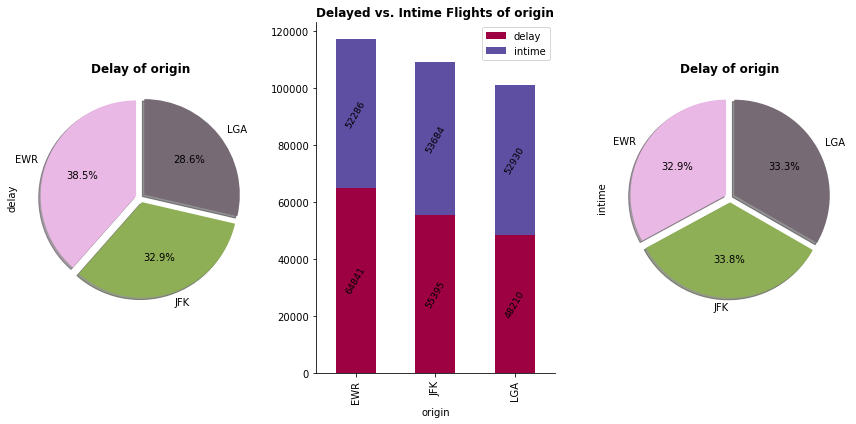

In [30]:
fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(1,3,1)
colors = random_color(len(delay_origin))
delay_origin.plot(x='origin', y='delay', kind='pie', ax=ax1, legend=False, labels=delay_origin['origin'], 
                  autopct='%1.1f%%',explode=[0.05,0.05,0.05], shadow=True, colors=colors, startangle=90)
ax1.set_title('Delay of origin', fontweight='bold')

ax2=fig.add_subplot(1,3,2)
info_origin.plot.bar(stacked=True, ax=ax2, x='origin', cmap=cmap)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title('Delayed vs. Intime Flights of origin', fontweight='bold')
ax2.bar_label(container=ax2.containers[0], label_type='center', fontsize=9.5, rotation=60)
ax2.bar_label(container=ax2.containers[1], label_type='center', fontsize=9.5, rotation=60)

ax3=fig.add_subplot(1,3,3)
intime_origin.plot(x='origin', y='intime', kind='pie', ax=ax3, legend=False, labels=intime_origin['origin'], 
                  autopct='%1.1f%%',explode=[0.05,0.05,0.05], shadow=True, colors=colors, startangle=90)
ax3.set_title('Delay of origin', fontweight='bold')

plt.tight_layout()
plt.show()

## Bài 2:
● Thực hiện tương tự với các hãng hàng không (cột 'carrier').


In [31]:
# Đếm số chuyến bay trễ của các hãng hàng không (cột ‘carrier’)
temp = df[['carrier','dep_delay','arr_delay']][(df['dep_delay'] > 0) | (df['arr_delay'] > 0)]
delay_carrier = temp.groupby('carrier')['carrier'].count().reset_index(name='delay')
delay_carrier

,carrier,delay
0,9E,8562
1,AA,14143
2,AS,289
3,B6,28545
4,DL,21473
5,EV,28277
6,F9,476
7,FL,2156
8,HA,129
9,MQ,12715


In [32]:
# Đếm số chuyến bay trễ của các hãng hàng không (cột ‘carier’)
temp = df[['carrier','dep_delay','arr_delay']][(df['dep_delay'] <= 0) | (df['arr_delay'] <= 0)]
intime_carrier = temp.groupby('carrier')['carrier'].count().reset_index(name='intime')
intime_carrier

,carrier,intime
0,9E,12239
1,AA,25279
2,AS,584
3,B6,37613
4,DL,37532
5,EV,31925
6,F9,425
7,FL,1789
8,HA,305
9,MQ,18093


In [33]:
info_carrier = delay_carrier.merge(intime_carrier)
info_carrier

,carrier,delay,intime
0,9E,8562,12239
1,AA,14143,25279
2,AS,289,584
3,B6,28545,37613
4,DL,21473,37532
5,EV,28277,31925
6,F9,476,425
7,FL,2156,1789
8,HA,129,305
9,MQ,12715,18093


In [34]:
ex1 = []
for i in info_carrier['delay']:
    if i/np.sum(info_carrier['delay']) < 0.005:
        ex1.append(0.5)
    else:
        ex1.append(0)

ex2 = []
for i in info_carrier['intime']:
    if i/np.sum(info_carrier['intime']) < 0.005:
        ex2.append(0.5)
    else:
        ex2.append(0)


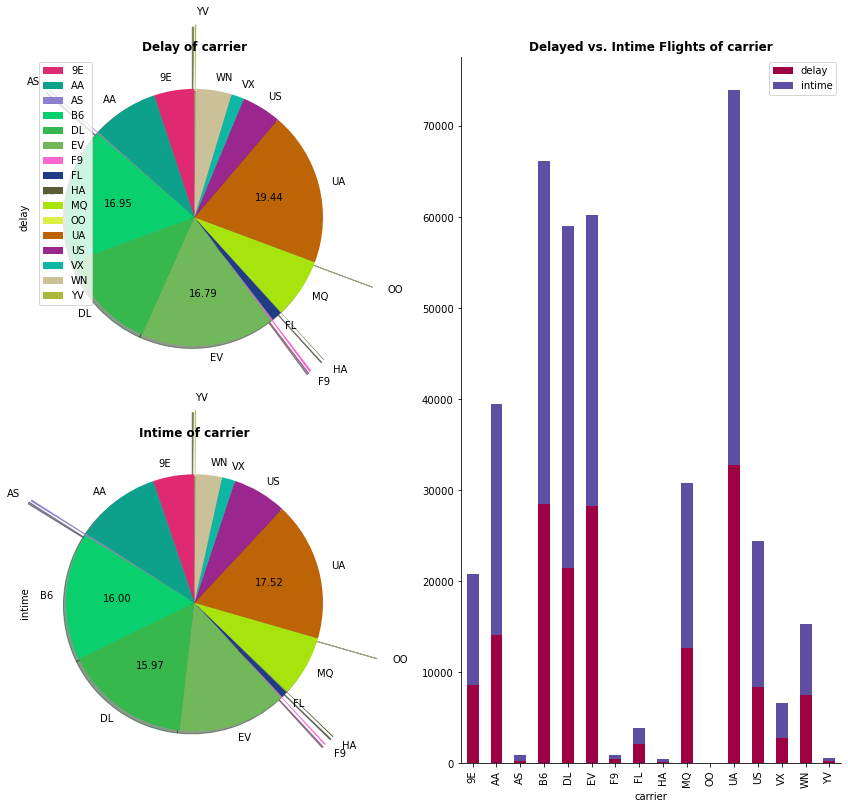

In [45]:
fig=plt.figure(figsize=(15,13))
ax1=fig.add_subplot(2,2,1)
colors = random_color(len(delay_carrier))
delay_carrier.plot(x='carrier', y='delay', kind='pie', ax=ax1, legend=True, labels=delay_carrier['carrier'], 
                  explode=ex1, shadow=True, colors=colors, startangle=90,
                   autopct=lambda p: format(p, '.2f') if p > 15 else None)
ax1.set_title('Delay of carrier', fontweight='bold')

ax2=fig.add_subplot(1,2,2)
info_carrier.plot.bar(stacked=True, ax=ax2, x='carrier', cmap=cmap)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title('Delayed vs. Intime Flights of carrier', fontweight='bold')
# ax2.bar_label(container=ax2.containers[0], label_type='center', fontsize=9.5, rotation=60)
# ax2.bar_label(container=ax2.containers[1], label_type='center', fontsize=9.5, rotation=60)

ax3=fig.add_subplot(2,2,3)
intime_carrier.plot(x='carrier', y='intime', kind='pie', ax=ax3, legend=False, labels=intime_carrier['carrier'], 
                  explode=ex2, shadow=True, colors=colors, startangle=90,
                   autopct=lambda p: format(p, '.2f') if p > 15 else None)
ax3.set_title('Intime of carrier', fontweight='bold')

# plt.tight_layout()
plt.show()

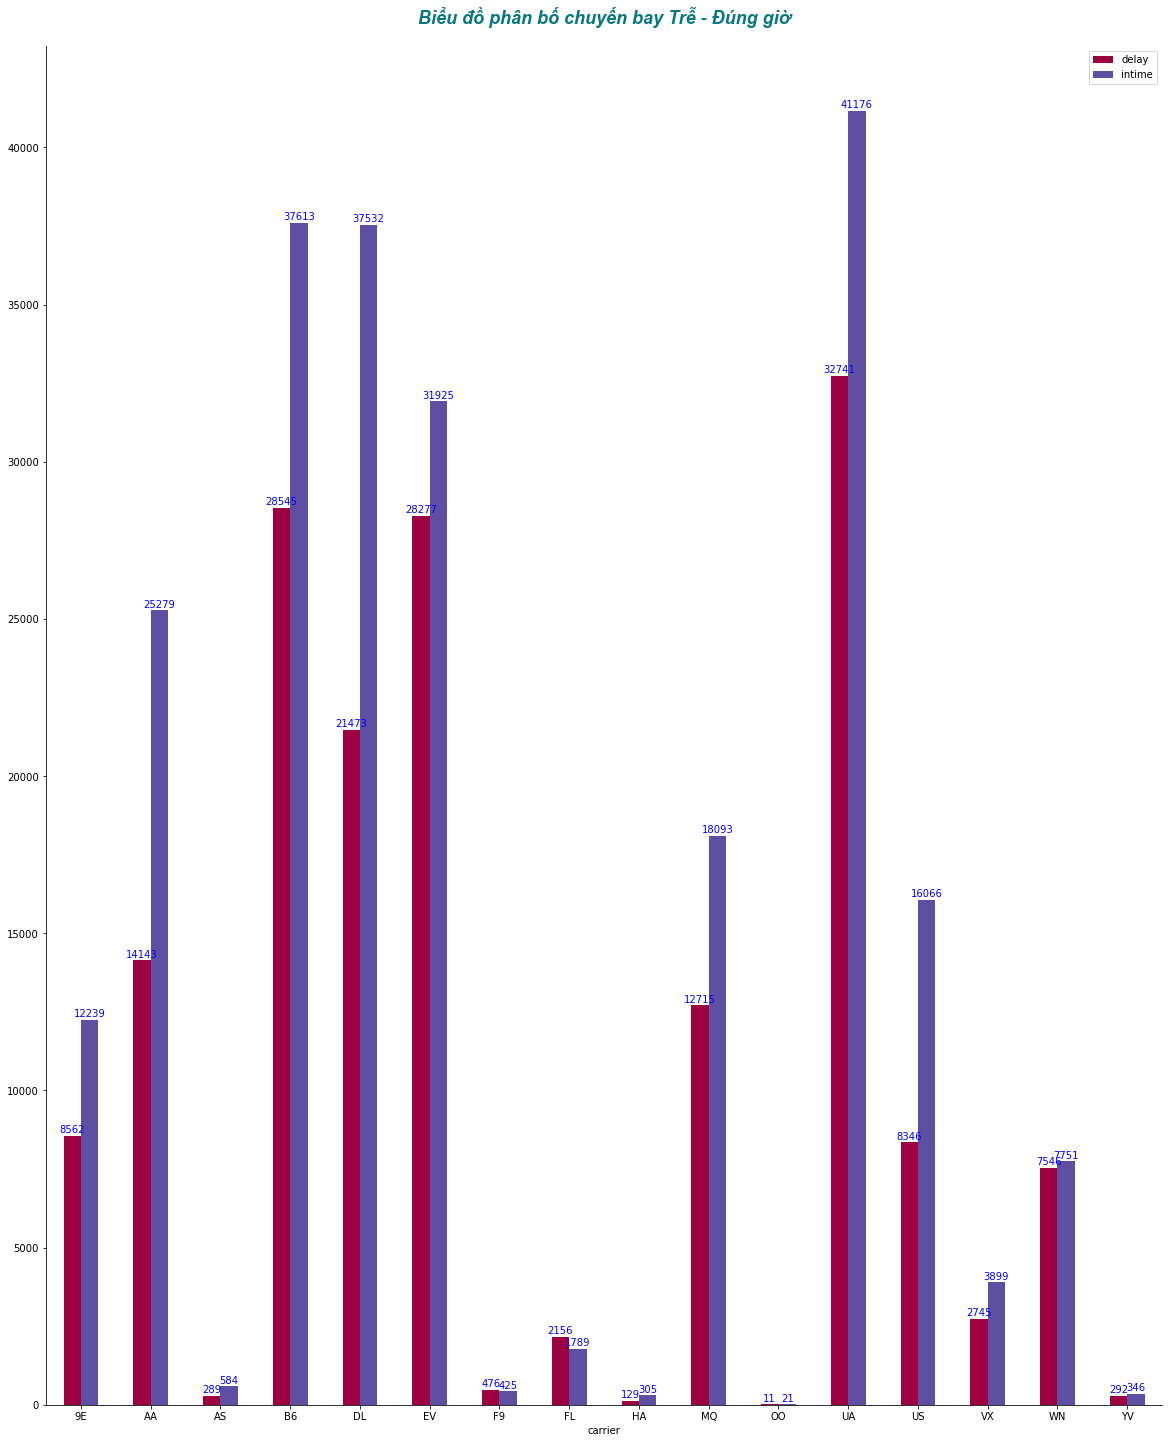

In [52]:
fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot()

info_carrier.plot.bar(ax=ax, rot = 0, legend = 'reverse', x='carrier', cmap=cmap)
                     
# Thiết lập title cho biểu đồ 3
ax.set_title("Biểu đồ phân bố chuyến bay Trễ - Đúng giờ",
              loc = 'center',
              fontstyle = 'oblique',
              fontname='Arial',
              weight = 'bold',
              fontsize = 18,
              color = 'xkcd:deep aqua',
              pad = 22
             )
# Get biểu đồ hiện tại
ax = plt.gca()
# Tạo giá trị cho mỗi cột bar
ax.bar_label(container = ax.containers[0], color = 'b', padding = 1)
ax.bar_label(container = ax.containers[1], color = 'b', padding = 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc = 'upper right')

plt.show()

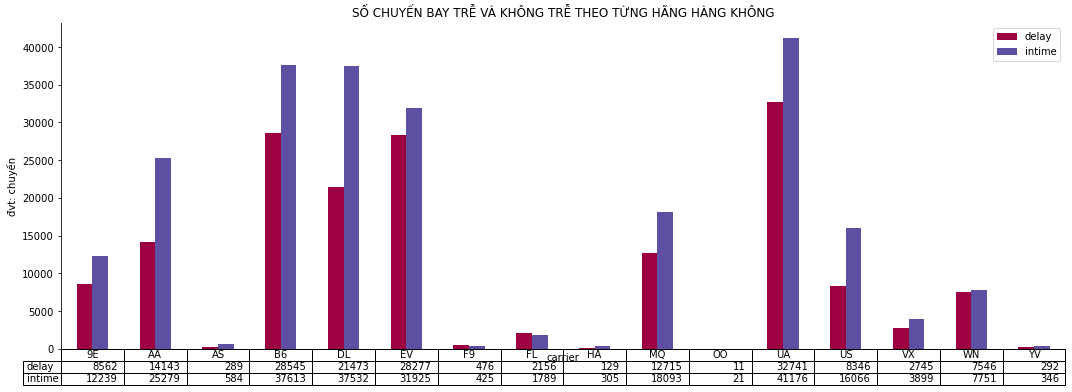

In [54]:
# Vẽ biểu đồ và bảng
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax1 = info_carrier.plot.bar(ax=ax, table=True, x='carrier', cmap=cmap)
plt.xticks([])
plt.title("SỐ CHUYẾN BAY TRỄ VÀ KHÔNG TRỄ THEO TỪNG HÃNG HÀNG KHÔNG")
ax.set_ylabel("đvt: chuyến")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.tight_layout()
plt.close("all")

## Bài 3:

● Tính thời gian trễ (gồm dep_delay và arr_delay) trung bình của các hãng

● Tính thời gian trễ (gồm dep_delay và arr_delay) trung bình từ các sân bay

● Vẽ các kết quả lên biểu đồ

In [218]:
temp = df[['carrier','dep_delay','arr_delay']][(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]
mdelay_carrier = temp.groupby('carrier')[['dep_delay','arr_delay']].mean()

mdelay_carrier

,dep_delay,arr_delay
carrier,,
9E,63.448071,60.576261
AA,52.562088,53.099880
AS,50.712000,45.416000
B6,49.388598,51.587613
DL,51.976595,53.057772
EV,58.747798,58.536621
F9,57.167969,63.578125
FL,47.232323,51.943001
HA,75.594595,72.405405


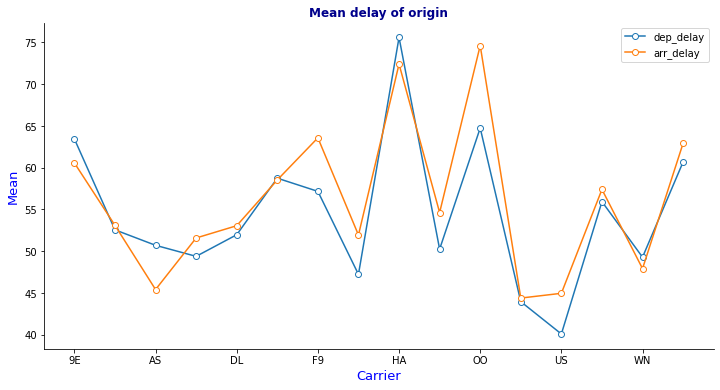

In [238]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

mdelay_carrier.plot(ax=axes, kind='line', marker='o', markerfacecolor='white')
# mdelay_carrier.plot(ax=axes, kind='line', style='*-')

axes.set_title('Mean delay of origin', fontweight='bold', color='darkblue')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Carrier',fontsize=13,color='blue')
axes.set_ylabel('Mean',fontsize=13,color='blue')
plt.show()

In [220]:
temp = df[['origin','dep_delay','arr_delay']][(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]
mdelay_origin = temp.groupby('origin')[['dep_delay','arr_delay']].mean()
mdelay_origin

,dep_delay,arr_delay
origin,,
EWR,51.232082,51.584599
JFK,50.658255,52.199775
LGA,52.640706,53.956812


## Bài 4:
Tính tổng, trung bình, mean, median của quãng đường bay của từng hãng (cột 'distance').


In [8]:
temp = df[['carrier','distance']]
distance_carrier = temp.groupby('carrier')['distance'].mean().reset_index(name='mean')
distance_carrier = distance_carrier.merge(temp.groupby('carrier')['distance'].max().reset_index(name='max'))
distance_carrier = distance_carrier.merge(temp.groupby('carrier')['distance'].min().reset_index(name='min'))
distance_carrier = distance_carrier.merge(temp.groupby('carrier')['distance'].sum().reset_index(name='sum'))
distance_carrier = distance_carrier.merge(temp.groupby('carrier')['distance'].median().reset_index(name='median'))

distance_carrier

,carrier,mean,max,min,sum,median
0,9E,529.889615,1587,94,9163911,509.0
1,AA,1343.279870,2586,187,42913762,1096.0
2,AS,2402.000000,2402,2402,1703018,2402.0
3,B6,1069.689615,2586,173,57815654,1023.0
4,DL,1237.979143,2586,94,58999610,1020.0
5,EV,562.865031,1389,80,28766906,533.0
6,F9,1620.000000,1620,1620,1103220,1620.0
7,FL,664.787402,762,397,2110700,762.0
8,HA,4983.000000,4983,4983,1704186,4983.0
9,MQ,570.374566,1147,184,14280468,502.0


In [10]:
# Tính tổng, trung bình, median và mean của quãng đường bay của từng hãng
distance_stats = temp.groupby("carrier")["distance"].agg(["sum", "mean", "median", "std"])
distance_stats.columns = ["Total Distance", "Mean Distance", "Median Distance", "Standard Deviation"]
distance_stats

,Total Distance,Mean Distance,Median Distance,Standard Deviation
carrier,,,,
9E,9163911,529.889615,509.0,320.273580
AA,42913762,1343.279870,1096.0,639.767314
AS,1703018,2402.000000,2402.0,0.000000
B6,57815654,1069.689615,1023.0,703.990549
DL,58999610,1237.979143,1020.0,660.646279
EV,28766906,562.865031,533.0,287.197483
F9,1103220,1620.000000,1620.0,0.000000
FL,2110700,664.787402,762.0,160.930718
HA,1704186,4983.000000,4983.0,0.000000
